In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from collections import Counter


Exploring raw data


In [30]:


images_dir = Path("../data/raw/images").resolve()
exts = {".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tif", ".tiff", ".webp"}

if not images_dir.exists():
    print(f"Not found: {images_dir}")
else:
    results = []
    for d in sorted(p for p in images_dir.iterdir() if p.is_dir()):
        ext_counts = Counter()
        total = 0
        for f in d.iterdir():
            if f.is_file():
                ext = f.suffix.lower()
                if ext in exts:
                    ext_counts[ext.lstrip('.')] += 1
                    total += 1
        results.append((d, total, ext_counts))

    # sort by total images descending
    results.sort(key=lambda x: x[1], reverse=True)

    overall = Counter()
    for d, total, ext_counts in results:
        formats = ", ".join(f"{k}: {v}" for k, v in sorted(ext_counts.items(), key=lambda x: -x[1]))
        print(f"{d.name}: {total} images" + (f" ({formats})" if formats else ""))
        overall.update(ext_counts)

    if overall:
        total_images = sum(overall.values())
        overall_fmt = ", ".join(f"{k}: {v}" for k, v in sorted(overall.items(), key=lambda x: -x[1]))
        print(f"\nTotal images: {total_images} ({overall_fmt})")

Vincent_van_Gogh: 877 images (jpg: 877)
Edgar_Degas: 702 images (jpg: 702)
Pablo_Picasso: 439 images (jpg: 439)
Pierre-Auguste_Renoir: 336 images (jpg: 336)
Albrecht_Dürer: 328 images (jpg: 328)
Paul_Gauguin: 311 images (jpg: 311)
Francisco_Goya: 291 images (jpg: 291)
Rembrandt: 262 images (jpg: 262)
Alfred_Sisley: 259 images (jpg: 259)
Titian: 255 images (jpg: 255)
Marc_Chagall: 239 images (jpg: 239)
Rene_Magritte: 194 images (jpg: 194)
Amedeo_Modigliani: 193 images (jpg: 193)
Paul_Klee: 188 images (jpg: 188)
Henri_Matisse: 186 images (jpg: 186)
Andy_Warhol: 181 images (jpg: 181)
Mikhail_Vrubel: 171 images (jpg: 171)
Sandro_Botticelli: 164 images (jpg: 164)
Leonardo_da_Vinci: 143 images (jpg: 143)
Peter_Paul_Rubens: 141 images (jpg: 141)
Salvador_Dali: 139 images (jpg: 139)
Hieronymus_Bosch: 137 images (jpg: 137)
Pieter_Bruegel: 134 images (jpg: 134)
Diego_Velazquez: 128 images (jpg: 128)
Kazimir_Malevich: 126 images (jpg: 126)
Frida_Kahlo: 120 images (jpg: 120)
Giotto_di_Bondone: 119

In [31]:
artists_file = Path("../data/artists.csv").resolve()
artists = pd.read_csv(artists_file)
artists = artists.sort_values(by=['paintings'], ascending=False)

# Create a dataframe with artists having more than 99 paintings
artists_top = artists[artists['paintings'] >= 99].reset_index()
artists_top = artists_top[['name', 'paintings']]
artists_top['class_weight'] = artists_top.paintings.sum() / (artists_top.shape[0] * artists_top.paintings)
artists_top

,name,paintings,class_weight
0,Vincent van Gogh,877,0.264465
1,Edgar Degas,702,0.330392
2,Pablo Picasso,439,0.528327
3,Pierre-Auguste Renoir,336,0.690284
4,Albrecht Dürer,328,0.707120
5,Paul Gauguin,311,0.745773
6,Francisco Goya,291,0.797029
7,Rembrandt,262,0.885250
8,Alfred Sisley,259,0.895504
9,Titian,255,0.909551


Exploring distributions.

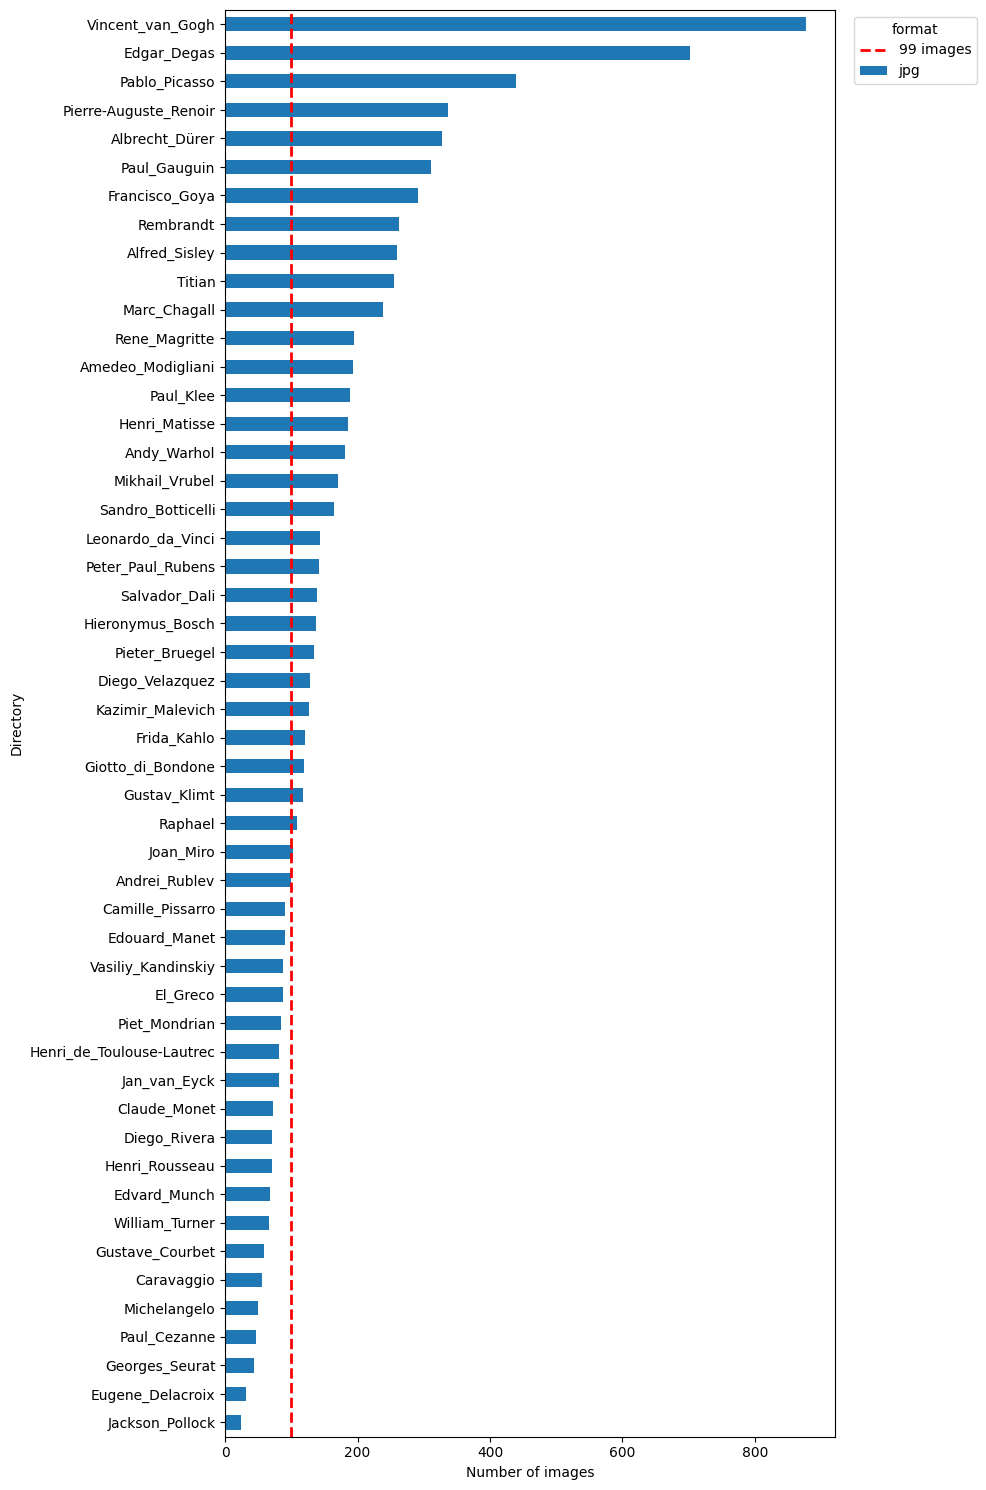

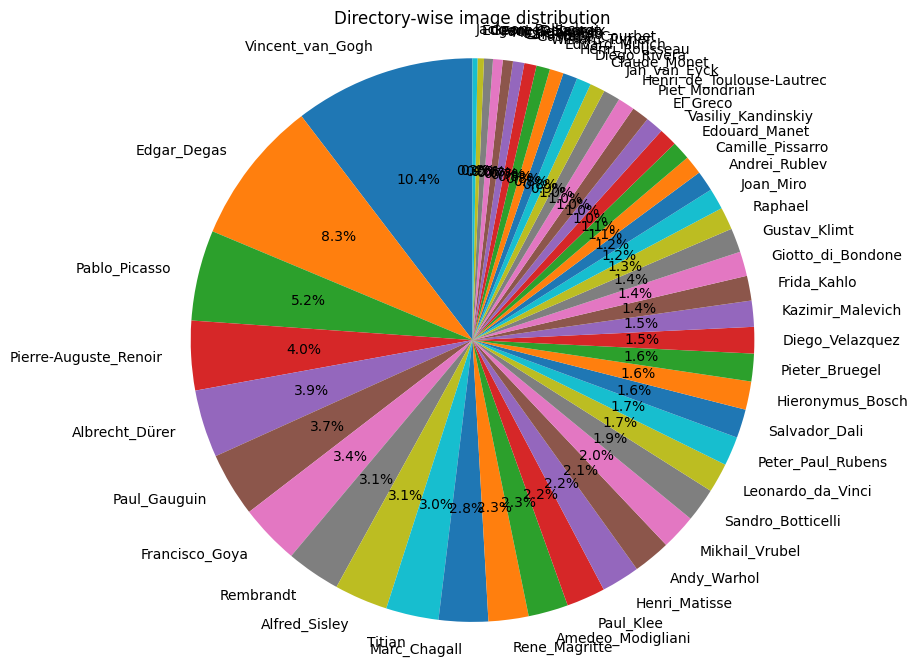

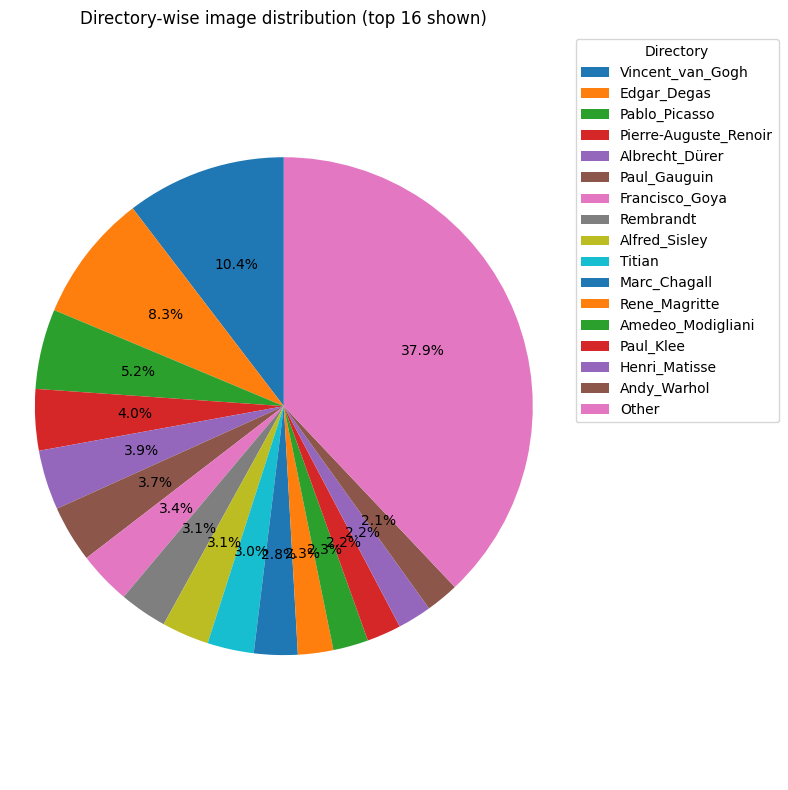

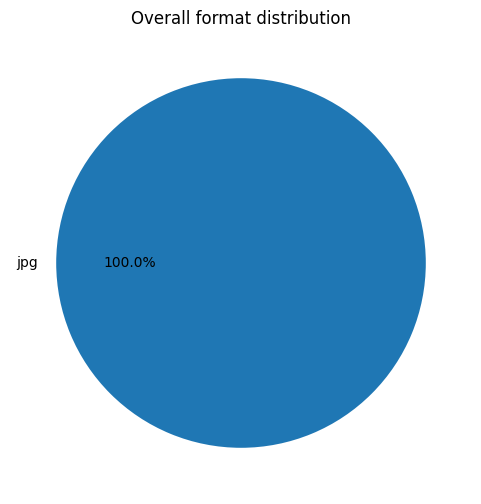

In [32]:
if not results:
    print("No results to plot")
else:
    rows = []
    for d, total, ext_counts in results:
        row = {"dir": d.name, "total": total}
        row.update(ext_counts)
        rows.append(row)

    df = pd.DataFrame(rows).fillna(0).set_index("dir")
    format_cols = [c for c in df.columns if c != "total"]
    # order formats by overall frequency
    format_cols = df[format_cols].sum().sort_values(ascending=False).index.tolist()
    df = df.sort_values("total", ascending=False)

    # stacked horizontal bar chart (one bar per directory)
    ax = df[format_cols].plot.barh(stacked=True, figsize=(10, max(4, len(df) * 0.3)))
    ax.invert_yaxis()
    ax.set_xlabel("Number of images")
    ax.set_ylabel("Directory")
    # add red dotted vertical line at number of images = 99
    ax.axvline(99, color="red", linestyle="--", linewidth=2, label="99 images")
    ax.legend(title="format", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    # pie chart version of the bar chart (one slice per directory)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(df["total"], labels=df.index, autopct="%1.1f%%", startangle=90)
    ax.set_title("Directory-wise image distribution")
    ax.axis("equal")
    plt.show()

    n_top = 16
    counts = df["total"].copy()
    if len(counts) > n_top:
        top = counts.nlargest(n_top)
        others = counts.drop(top.index).sum()
        labels = top.index.tolist() + ["Other"]
        sizes = top.tolist() + [others]
    else:
        labels = counts.index.tolist()
        sizes = counts.tolist()

    fig, ax = plt.subplots(figsize=(8, 8))
    if len(labels) > 8:
        # hide labels on slices and show legend outside for readability
        wedges, _, _ = ax.pie(sizes, labels=None, autopct=lambda p: ('%1.1f%%' % p) if p > 0.5 else '', startangle=90)
        ax.legend(wedges, labels, title="Directory", bbox_to_anchor=(1.02, 1), loc="upper left")
    else:
        ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
    ax.set_title(f"Directory-wise image distribution (top {n_top} shown)" if len(counts) > n_top else "Directory-wise image distribution")
    ax.axis("equal")
    plt.tight_layout()
    plt.show()

    # overall format distribution
    overall = df[format_cols].sum()
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(overall, labels=overall.index, autopct="%1.1f%%")
    ax.set_title("Overall format distribution")
    plt.show()
# ...existing code...

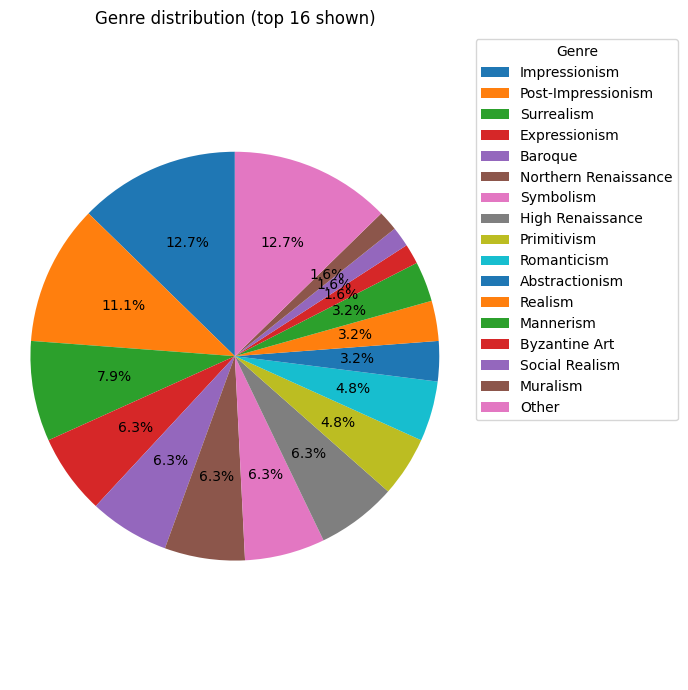

In [33]:
artists_file = Path("../data/artists.csv").resolve()
if not artists_file.exists():
    print(f"Not found: {artists_file}")
else:
    df_artists = pd.read_csv(artists_file)
    if "genre" not in df_artists.columns:
        print("No 'genre' column in artists.csv")
    else:
        # handle multi-valued genre fields (split on common separators)
        genres = (
            df_artists["genre"]
            .fillna("Unknown")
            .astype(str)
            .str.split(r"[|,;/]+", regex=True)
            .explode()
            .str.strip()
            .replace("", "Unknown")
            .fillna("Unknown")
        )
        counts = genres.value_counts()

        # group small genres into "Other" for readability
        n_top = 16
        if len(counts) > n_top:
            top = counts.nlargest(n_top)
            others = counts.drop(top.index).sum()
            labels = top.index.tolist() + ["Other"]
            sizes = top.tolist() + [others]
            title = f"Genre distribution (top {n_top} shown)"
        else:
            labels = counts.index.tolist()
            sizes = counts.tolist()
            title = "Genre distribution"

        fig, ax = plt.subplots(figsize=(7, 7))
        if len(labels) > 8:
            wedges, _, _ = ax.pie(
                sizes,
                labels=None,
                autopct=lambda p: ('%1.1f%%' % p) if p > 0.5 else "",
                startangle=90,
            )
            ax.legend(wedges, labels, title="Genre", bbox_to_anchor=(1.02, 1), loc="upper left")
        else:
            ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
        ax.set_title(title)
        ax.axis("equal")
        plt.tight_layout()
        plt.show()

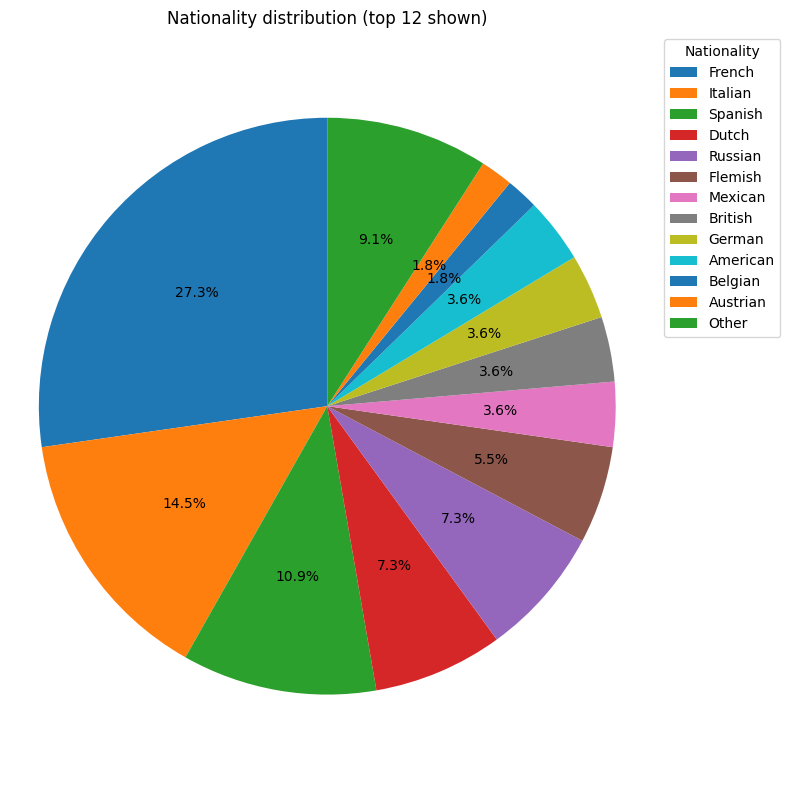

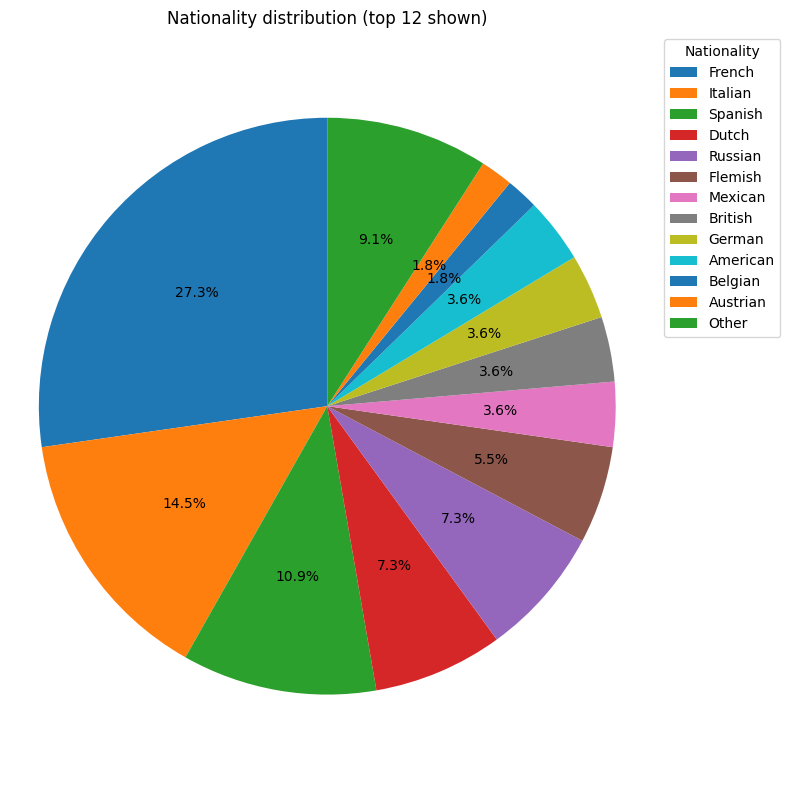

In [34]:
artists_file = Path("../data/artists.csv").resolve()
if not artists_file.exists():
    print(f"Not found: {artists_file}")
else:
    df_artists = pd.read_csv(artists_file)
    if "nationality" not in df_artists.columns:
        print("No 'nationality' column in artists.csv")
    else:
        # handle multi-valued nationality fields and clean
        nats = (
            df_artists["nationality"]
            .fillna("Unknown")
            .astype(str)
            .str.split(r"[|,;/]+", regex=True)
            .explode()
            .str.strip()
            .replace("", "Unknown")
            .fillna("Unknown")
        )
        counts = nats.value_counts()

        # group small nationalities into "Other" for readability
        n_top = 12
        if len(counts) > n_top:
            top = counts.nlargest(n_top)
            others = counts.drop(top.index).sum()
            labels = top.index.tolist() + ["Other"]
            sizes = top.tolist() + [others]
            title = f"Nationality distribution (top {n_top} shown)"
        else:
            labels = counts.index.tolist()
            sizes = counts.tolist()
            title = "Nationality distribution"

        fig, ax = plt.subplots(figsize=(8, 8))
        if len(labels) > 10:
            wedges, _, _ = ax.pie(
                sizes,
                labels=None,
                autopct=lambda p: ('%1.1f%%' % p) if p > 0.5 else "",
                startangle=90,
            )
            ax.legend(wedges, labels, title="Nationality", bbox_to_anchor=(1.02, 1), loc="upper left")
        else:
            ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
        ax.set_title(title)
        ax.axis("equal")
        plt.tight_layout()
        plt.show()

artists_file = Path("../data/artists.csv").resolve()
if not artists_file.exists():
    print(f"Not found: {artists_file}")
else:
    df_artists = pd.read_csv(artists_file)
    if "nationality" not in df_artists.columns:
        print("No 'nationality' column in artists.csv")
    else:
        # handle multi-valued nationality fields and clean
        nats = (
            df_artists["nationality"]
            .fillna("Unknown")
            .astype(str)
            .str.split(r"[|,;/]+", regex=True)
            .explode()
            .str.strip()
            .replace("", "Unknown")
            .fillna("Unknown")
        )
        counts = nats.value_counts()

        # group small nationalities into "Other" for readability
        n_top = 12
        if len(counts) > n_top:
            top = counts.nlargest(n_top)
            others = counts.drop(top.index).sum()
            labels = top.index.tolist() + ["Other"]
            sizes = top.tolist() + [others]
            title = f"Nationality distribution (top {n_top} shown)"
        else:
            labels = counts.index.tolist()
            sizes = counts.tolist()
            title = "Nationality distribution"

        fig, ax = plt.subplots(figsize=(8, 8))
        if len(labels) > 10:
            wedges, _, _ = ax.pie(
                sizes,
                labels=None,
                autopct=lambda p: ('%1.1f%%' % p) if p > 0.5 else "",
                startangle=90,
            )
            ax.legend(wedges, labels, title="Nationality", bbox_to_anchor=(1.02, 1), loc="upper left")
        else:
            ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
        ax.set_title(title)
        ax.axis("equal")
        plt.tight_layout()
        plt.show()
